### Linear Regression

In [2]:
using Pkg
Pkg.installed()

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg C:\Users\paulo\AppData\Local\Programs\Julia-1.11.4\share\julia\stdlib\v1.11\Pkg\src\Pkg.jl:787


Dict{String, VersionNumber} with 5 entries:
  "Statistics"    => v"1.11.1"
  "LinearAlgebra" => v"1.11.0"
  "IJulia"        => v"1.26.0"
  "Plots"         => v"1.40.11"
  "Random"        => v"1.11.0"

In [8]:
Pkg.add("CSV")
Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `C:\Users\paulo\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\paulo\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
   Installed Crayons ──────────── v4.1.1
   Installed InvertedIndices ──── v1.3.1
   Installed StringManipulation ─ v0.4.1
   Installed DataFrames ───────── v1.7.0
   Installed PrettyTables ─────── v2.4.0
    Updating `C:\Users\paulo\.julia\environments\v1.11\Project.toml`
  [a93c6f00] + DataFrames v1.7.0
    Updating `C:\Users\paulo\.julia\environments\v1.11\Manifest.toml`
  [a8cc5b0e] + Crayons v4.1.1
  [a93c6f00] + DataFrames v1.7.0
  [41ab1584] + InvertedIndices v1.3.1
  [08abe8d2] + PrettyTables v2.4.0
  [892a3eda] + StringManipulation v0.4.1
Precompiling project...
    971.6 ms  ✓ InvertedIndices
    878.0 ms  ✓ Crayons
   1354.2 ms  ✓ StringManipulation
  12015.6 ms  ✓ PrettyTables
  23354.8 ms  ✓ DataFrames
   2893.3 ms  ✓ Latexify → DataFramesExt
  6 dependencies succes

In [9]:
using CSV
using DataFrames

In [79]:
dataset = CSV.read("sales.csv", DataFrame)

Row,Promote,Sales
,Int64,Int64
1,23,554
2,56,1339
3,34,815
4,25,609
5,67,1600
6,82,2000
7,46,1000
8,14,300
9,6,150


In [80]:
X = dataset[:,"Promote"]
Y = dataset[:,"Sales"]

19-element Vector{Int64}:
  554
 1339
  815
  609
 1600
 2000
 1000
  300
  150
 1150
 1200
 2000
 1750
 2000
 1500
 1000
 1600
 2000
  550

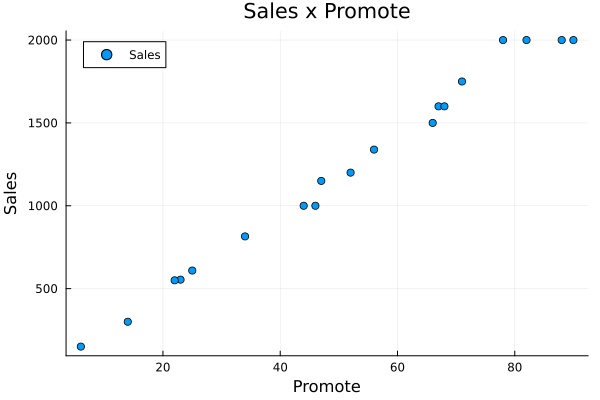

In [81]:
using Plots
#scatter(X,Y, xlabel="Promote", ylabel="Sales", labels="Sales")
scatter(dataset.Promote,dataset.Sales, xlabel="Promote", ylabel="Sales", labels="Sales")
title!("Sales x Promote")

In [ ]:
# Linear Regression ...
# y = mx + c
# Sales = Slope * Promote + Intercept

### Linear Regression: Method 1

m = 23.50640302155077 and c = 5.485865363252515


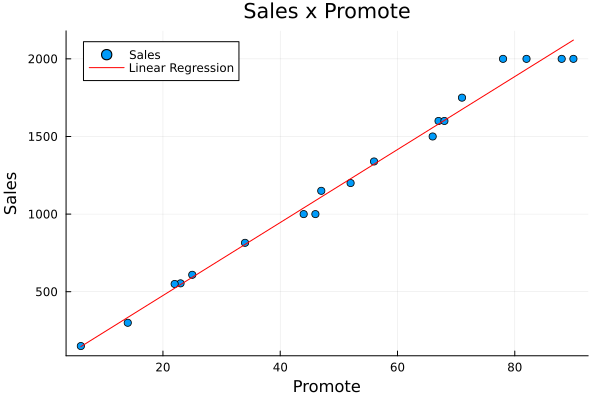

In [82]:
using Statistics
m = sum((X .- mean(X)) .* (Y .- mean(Y))) / sum((X .- mean(X)) .* (X .- mean(X)))
c = mean(Y) - m .* mean(X)
println("m = $m and c = $c")
model1 = m .* X .+ c
plot!(X,model1, labels="Linear Regression", color=:red, linestyle=:solid)

### Linear Regression: Method 2

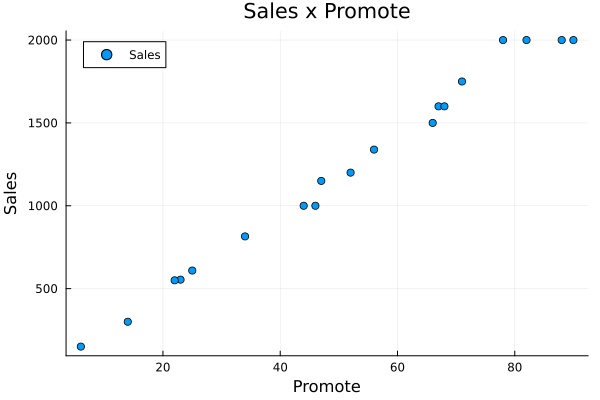

In [83]:
scatter(dataset.Promote,dataset.Sales, xlabel="Promote", ylabel="Sales", labels="Sales")
title!("Sales x Promote")

In [84]:
Pkg.add("GLM");   # ML package
using GLM

   Resolving package versions...
  No Changes to `C:\Users\paulo\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\paulo\.julia\environments\v1.11\Manifest.toml`


In [85]:
ols = lm(@formula(Sales ~ Promote), dataset)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Sales ~ 1 + Promote

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)   5.48587   34.718      0.16    0.8763   -67.7627    78.7344
Promote      23.5064     0.606353  38.77    <1e-17    22.2271    24.7857
────────────────────────────────────────────────────────────────────────

In [86]:
predict(ols, DataFrame(Promote = [50]))

1-element Vector{Union{Missing, Float64}}:
 1180.8060164407912

### Multiple Linear Regression

In [87]:
using CSV, DataFrames
dataset = CSV.read("salary.csv", DataFrame)
# Multiple Linear Regression ...
# y = m0x0 + m1x1 + m2x2 + c
ols = lm(@formula(Salary ~ Years_Previous_Experience + Years_Employed + Years_Education + Gender), dataset)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Salary ~ 1 + Years_Previous_Experience + Years_Employed + Years_Education + Gender

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)                23167.1      2072.0    11.18    <1e-13   18982.6   27351.6
Years_Previous_Experience   -114.747     239.075  -0.48    0.6338    -597.57    368.075
Years_Employed               656.497     144.942   4.53    <1e-04     363.78    949.214
Years_Education             1903.99      386.932   4.92    <1e-04    1122.56   2685.41
Gender: Male                1468.1      1804.27    0.81    0.4205   -2175.69   5111.9
──────────

In [88]:
predict(ols, DataFrame(Years_Previous_Experience = [5], Years_Employed = [7], Years_Education = [12], Gender = ["Male"]))

1-element Vector{Union{Missing, Float64}}:
 51504.7859084076

In [89]:
predict(ols, DataFrame(Years_Previous_Experience = [5], Years_Employed = [7], Years_Education = [12], Gender = ["Female"]))

1-element Vector{Union{Missing, Float64}}:
 50036.684170866014

In [90]:
predict(ols, DataFrame(Years_Previous_Experience = [5,4], Years_Employed = [7,9], Years_Education = [12,15], Gender = ["Male","Female"]))

2-element Vector{Union{Missing, Float64}}:
 51504.7859084076
 57176.381833773674